In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston_Housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
crim_avg = df['CRIM'].astype('float').mean()
df['CRIM'].replace(np.NaN, crim_avg, inplace=True)

In [6]:
df.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
zn_avg = df['ZN'].astype('float').mean()
df['ZN'].replace(np.NaN, zn_avg, inplace=True)

In [8]:
indus_avg = df['INDUS'].astype('float').mean()
df['INDUS'].replace(np.NaN, indus_avg, inplace=True)

In [9]:
chas_avg = df['CHAS'].astype('float').mean()
df['CHAS'].replace(np.NaN, chas_avg, inplace=True)

In [10]:
age_avg = df['AGE'].astype('float').mean()
df['AGE'].replace(np.NaN, age_avg, inplace=True)

In [11]:
lstat_avg = df['LSTAT'].astype('float').mean()
df['LSTAT'].replace(np.NaN, lstat_avg, inplace=True)

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

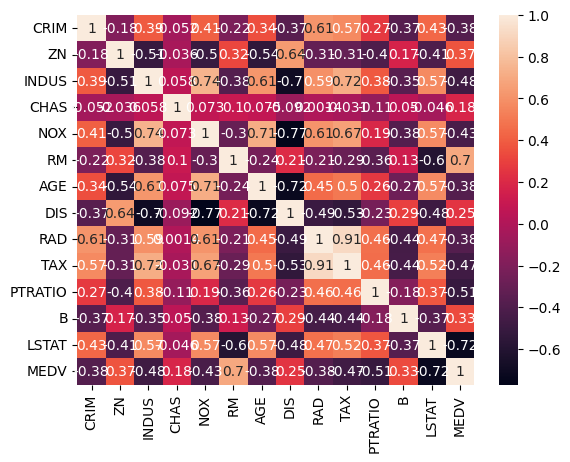

In [13]:
cormat = sns.heatmap(df.corr(), annot=True)

In [17]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']])
Y = df['MEDV']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([25.47145546, 30.79785955, 17.47925688, 25.58225762, 19.78065255,
       22.89841085, 16.92234966, 14.88129779, 22.06228513, 20.00710209,
       17.38546329, 18.19029953, -2.47859968, 22.40180749, 19.73754499,
       26.49741993, 17.17594745,  3.47433942, 37.59512416, 18.61044977,
       22.21983093, 26.97756344, 13.16478113, 24.26035649, 19.05290414,
       14.22273242, 20.10415853, 21.39670002, 17.83261539, 18.80005391,
       17.15812313, 26.64777512, 27.98187867, 18.6797099 , 15.61923055,
       17.28137807, 32.96219988, 21.84751284, 20.02037842, 22.24873356,
       12.1851882 , 28.89233435, 38.56893768, 18.25791591, 25.61705029,
       16.50208767, 15.67893992, 26.88753675, 19.6249147 , 28.85858537,
       20.54741418, 31.36740839, 18.00323309, 28.41415425, 35.13851249,
       23.93413288, 19.74313556, 31.51483134, 24.96280608, 15.05714175,
       27.19188875, 32.85800069, 29.46725696, 18.31124693, 28.57168447,
       10.73390191, 20.87764725, 26.22277629, 29.37540214, 16.86

In [23]:
from sklearn.metrics import mean_squared_error
rsme = np.sqrt(mean_squared_error(y_test,y_pred))
rsme

5.616272784779241

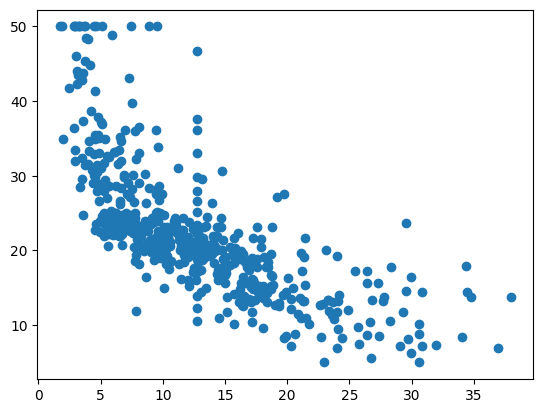

In [27]:
plt.scatter(df['LSTAT'],df['MEDV'])


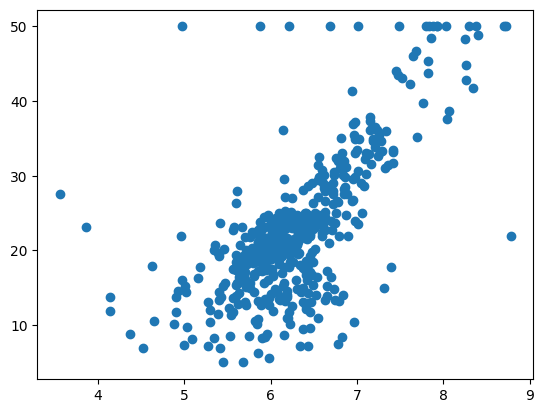

In [26]:
plt.scatter(df['RM'],df['MEDV'])